# Tensorflow Keras Boston House Data

#### Import der Bibliotheken

In [1]:
import numpy as np
import pandas as pd
import os
import imp

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.datasets import boston_housing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#### Laden der Daten

In [2]:
header_list = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df_houses = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', names = header_list, sep='\s+')

#### Exploration der Daten

In [3]:
df_houses.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


####  Train und Test Data

In [4]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [5]:
print(train_data.shape)
print(test_data.shape)
print(train_targets[0:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


#### Standardisierung der Daten

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

#### Baseline NN-Modell

In [7]:
def baseline_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse','mae'])
    return model

#### Large NN-Modell

In [8]:
def larger_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse','mae'])
    return model

#### Training

In [9]:
num_epochs = 50

In [10]:
network = baseline_model()
baseline_history = network.fit(train_data, train_targets, epochs=num_epochs, batch_size=1, verbose=1, validation_data=(test_data, test_targets))

Epoch 1/50
404/404 [==============================] - 1s 1ms/step - loss: 441.8928 - mse: 441.8928 - mae: 18.5790 - val_loss: 289.4270 - val_mse: 289.4270 - val_mae: 14.7323
Epoch 2/50
404/404 [==============================] - 0s 856us/step - loss: 121.5923 - mse: 121.5923 - mae: 7.8301 - val_loss: 74.7803 - val_mse: 74.7803 - val_mae: 6.5411
Epoch 3/50
404/404 [==============================] - 0s 870us/step - loss: 46.4801 - mse: 46.4801 - mae: 4.4644 - val_loss: 44.8482 - val_mse: 44.8482 - val_mae: 5.2144
Epoch 4/50
404/404 [==============================] - 0s 951us/step - loss: 34.4643 - mse: 34.4643 - mae: 3.8312 - val_loss: 32.3750 - val_mse: 32.3750 - val_mae: 4.4555
Epoch 5/50
404/404 [==============================] - 0s 912us/step - loss: 28.2761 - mse: 28.2761 - mae: 3.5280 - val_loss: 27.2418 - val_mse: 27.2418 - val_mae: 4.0301
Epoch 6/50
404/404 [==============================] - 0s 901us/step - loss: 25.1307 - mse: 25.1307 - mae: 3.2863 - val_loss: 21.9761 - val_mse: 

404/404 [==============================] - 0s 894us/step - loss: 7.8501 - mse: 7.8501 - mae: 1.8390 - val_loss: 16.7591 - val_mse: 16.7591 - val_mae: 2.4918
Epoch 50/50
404/404 [==============================] - 0s 873us/step - loss: 7.9044 - mse: 7.9044 - mae: 1.8078 - val_loss: 18.2051 - val_mse: 18.2051 - val_mae: 2.5389


In [11]:
network = larger_model()
large_history = network.fit(train_data, train_targets, epochs=num_epochs, batch_size=1, verbose=1, validation_data=(test_data, test_targets))

Epoch 1/50
404/404 [==============================] - 1s 1ms/step - loss: 161.2594 - mse: 161.2594 - mae: 9.1542 - val_loss: 28.4475 - val_mse: 28.4475 - val_mae: 4.1973
Epoch 2/50
404/404 [==============================] - 0s 925us/step - loss: 22.3909 - mse: 22.3909 - mae: 3.1388 - val_loss: 21.0361 - val_mse: 21.0361 - val_mae: 3.5650
Epoch 3/50
404/404 [==============================] - 0s 883us/step - loss: 17.9266 - mse: 17.9266 - mae: 2.7941 - val_loss: 21.9529 - val_mse: 21.9529 - val_mae: 3.2734
Epoch 4/50
404/404 [==============================] - 0s 919us/step - loss: 15.2163 - mse: 15.2163 - mae: 2.5710 - val_loss: 19.4631 - val_mse: 19.4631 - val_mae: 2.9587
Epoch 5/50
404/404 [==============================] - 0s 896us/step - loss: 14.1561 - mse: 14.1561 - mae: 2.4452 - val_loss: 19.9984 - val_mse: 19.9984 - val_mae: 3.0520
Epoch 6/50
404/404 [==============================] - 0s 917us/step - loss: 13.0901 - mse: 13.0901 - mae: 2.3234 - val_loss: 18.0663 - val_mse: 18.066

404/404 [==============================] - 0s 899us/step - loss: 5.6767 - mse: 5.6767 - mae: 1.5554 - val_loss: 16.4827 - val_mse: 16.4827 - val_mae: 2.6533
Epoch 50/50
404/404 [==============================] - 0s 911us/step - loss: 5.5812 - mse: 5.5812 - mae: 1.5640 - val_loss: 15.5615 - val_mse: 15.5615 - val_mae: 2.5929


In [12]:
print(baseline_history.history['loss'][0:5])
print(large_history.history['loss'][0:5])

[441.892822265625, 121.5923080444336, 46.48011016845703, 34.46430969238281, 28.276081085205078]
[161.25942993164062, 22.39089012145996, 17.926645278930664, 15.216323852539062, 14.156105995178223]


#### Small Model

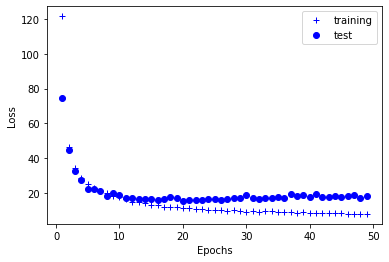

In [15]:
base_loss = baseline_history.history['loss']
base_val_loss = baseline_history.history['val_loss']
plot_history(base_loss, base_val_loss, 'training', 'test')

#### Large Model

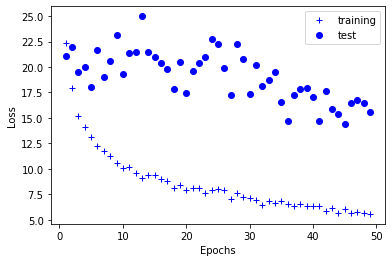

In [16]:
large_loss = large_history.history['loss']
large_val_loss = large_history.history['val_loss']
plot_history(large_loss, large_val_loss, 'training', 'test')

#### Utility Functions

In [14]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X_train, X_test, y_train, y_test, classifier, xlabel, ylabel, resolution=0.02):
    
    print(type(X_test))
    
    if X_test is None:
        X = X_train
        y = y_train
        test_idx = None
    else:
        X = np.vstack((X_train, X_test))
        y = np.hstack((y_train, y_test))
        test_idx = range(y_train.shape[0], y_train.shape[0]+y_test.shape[0])

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')
    plt.tight_layout()

def plot_history(hist1, hist2, label1, label2):
    epochs = range(1, len(hist1))
    hist1 = hist1[1:]
    hist2 = hist2[1:]
    # b+ is for "blue cross"
    plt.plot(epochs, hist1, 'b+', label=label1)
    # "bo" is for "blue dot"
    plt.plot(epochs, hist2, 'bo', label=label2)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()